In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

## Loading Data with yfinance

I am looking at Crowdstrike since there was a dip in the stock due to the software crash in the first two-thirds of 2024.

In [172]:
start = '2024-01-01'
end = '2024-08-25'

stock = 'CRWD'

crwd = yf.download(stock, start, end)

crwd.shape

[*********************100%***********************]  1 of 1 completed


(163, 6)

## Checking Data

In [173]:
crwd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,251.470001,252.289993,243.029999,246.889999,246.889999,3756800
2024-01-03,240.320007,248.830994,238.610001,244.360001,244.360001,3157600
2024-01-04,246.000000,247.610001,243.639999,245.649994,245.649994,2103000
2024-01-05,245.000000,249.479996,244.649994,247.460007,247.460007,2405900
2024-01-08,251.899994,261.639008,251.559998,261.279999,261.279999,4009200


In [174]:
crwd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,163.000000,163.000000,163.000000,163.000000,163.000000,1.630000e+02
mean,313.704651,318.833509,307.461085,313.327269,313.327269,5.395797e+06
std,42.350639,42.358236,41.886371,42.117987,42.117987,7.323922e+06
min,201.535004,221.475006,200.809998,217.889999,217.889999,1.456800e+06
25%,290.000000,294.174500,285.274994,291.449997,291.449997,2.449500e+06
50%,313.890015,319.480011,309.119995,314.600006,314.600006,3.203100e+06
75%,336.054993,343.334991,326.494995,333.360001,333.360001,4.974950e+06
max,392.510010,398.326996,386.660004,392.149994,392.149994,5.407740e+07


The difference between min and max is huge. Obviously because of the crash.

In [175]:
crwd.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No NANs in data. We can directly use this. The data is only for days when stock market was open (business days) and not for every day in the week. But since we only want to analyze the stock price without much reference to exact day in the week, we don't need to fix this.

## Visualizing the data

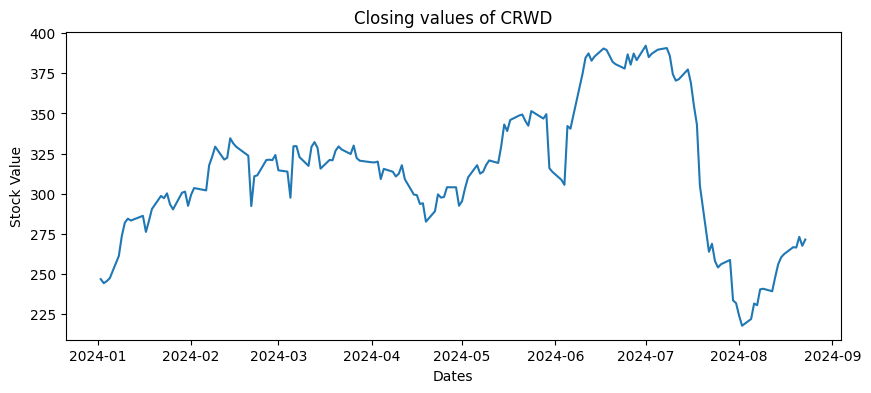

In [176]:
fig = plt.figure(figsize=(10, 4))
plt.plot(crwd.Close)
plt.title(f'Closing values of {stock}')
plt.xlabel(f'Dates')
plt.ylabel(f'Stock Value')
plt.show()

Annotating for major events. 

- 07/19/2024 when the update was pushed and almost immediately crashed PCs and systems.
- 07/31/2024 when Delta CEO Ed Bastian said the disruption had cost the airline $500 million, and Delta would sue CrowdStrike to recoup losses.
- An late February surge fueld by more activity on r/wallstreetbets.

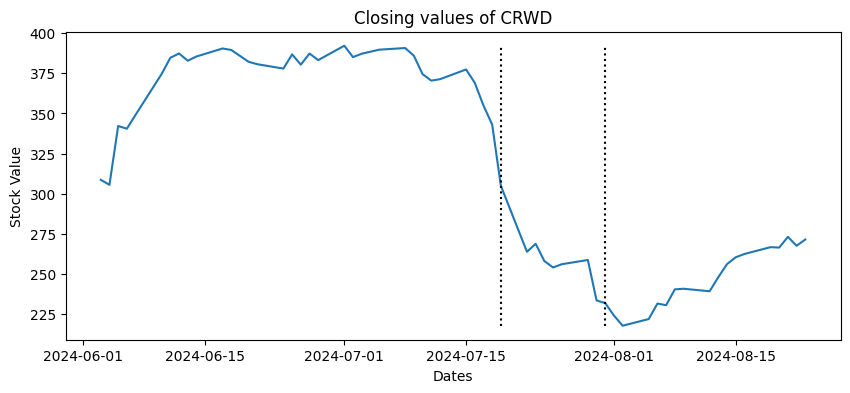

In [177]:
# Keeping only June-August of 2024
short_crwd = crwd["2024-06-01":end]

fig = plt.figure(figsize=(10, 4))
plt.plot(short_crwd.Close)
plt.title(f'Closing values of {stock}')
plt.xlabel(f'Dates')
plt.ylabel(f'Stock Value')

# Defining the major events
e1 = datetime.strptime("2024-07-19", "%Y-%m-%d")
e2 = datetime.strptime("2024-07-31", "%Y-%m-%d")

# Adding as vertical lines
plt.vlines(x=e1, ymin=short_crwd.Close.min(), ymax=short_crwd.Close.max(), linestyles='dotted', colors='black')
plt.vlines(x=e2, ymin=short_crwd.Close.min(), ymax=short_crwd.Close.max(), linestyles='dotted', colors='black')

plt.show()

Let's use a candlestick chart, specifically built for stocks, to visualize this.

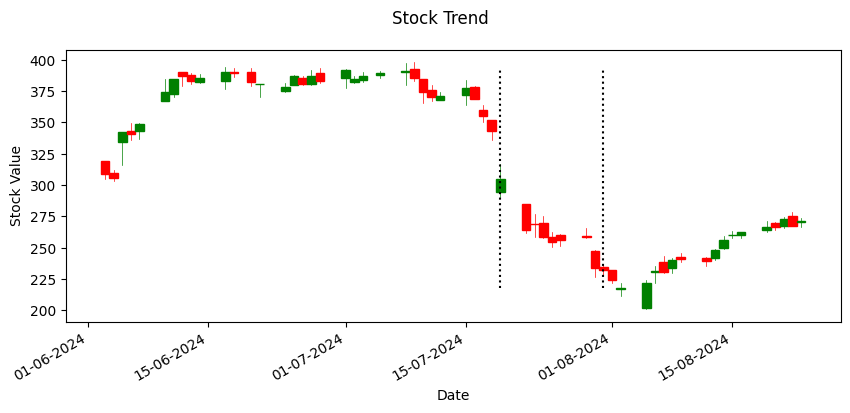

In [178]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates 

ohlc = short_crwd.reset_index().loc[:, ['Date', 'Open', 'High', 'Low', 'Close']] 
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num) 
ohlc = ohlc.astype(float) 
  
fig, ax = plt.subplots(figsize=(10, 4))
candlestick_ohlc(ax, ohlc.values, width=1, colorup='green', colordown='red') 
ax.set_xlabel('Date') 
ax.set_ylabel('Stock Value') 
fig.suptitle('Stock Trend') 
  
date_format = mpl_dates.DateFormatter('%d-%m-%Y') 
ax.xaxis.set_major_formatter(date_format) 
fig.autofmt_xdate() 

plt.vlines(x=e1, ymin=short_crwd.Close.min(), ymax=short_crwd.Close.max(), linestyles='dotted', colors='black')
plt.vlines(x=e2, ymin=short_crwd.Close.min(), ymax=short_crwd.Close.max(), linestyles='dotted', colors='black')

plt.show() 

The gaps between candles represent the weekend / holiday gaps.

We can see that since the failure, the stock price has been closing lower than opening on each day.

## Rolling averages

The data is quite noisy. Using a window function, we can calculate the rolling mean. In our case, we'll use the past 22 days of data. 

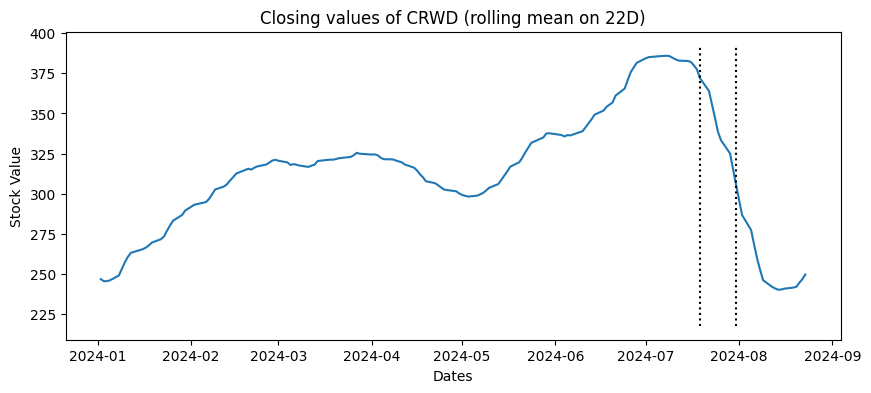

In [179]:
period = '22D'
crwd_rolling = crwd.rolling(period).mean()

fig = plt.figure(figsize=(10, 4))
plt.plot(crwd_rolling.Close)
plt.title(f'Closing values of {stock} (rolling mean on {period})')
plt.xlabel(f'Dates')
plt.ylabel(f'Stock Value')

# Defining the major events
e1 = datetime.strptime("2024-07-19", "%Y-%m-%d")
e2 = datetime.strptime("2024-07-31", "%Y-%m-%d")

# Adding as vertical lines
plt.vlines(x=e1, ymin=short_crwd.Close.min(), ymax=short_crwd.Close.max(), linestyles='dotted', colors='black')
plt.vlines(x=e2, ymin=short_crwd.Close.min(), ymax=short_crwd.Close.max(), linestyles='dotted', colors='black')

plt.show()

## Comparison with Market
Stocks are typically compared against an index S&P 500 which is an index of top 500 US companies and hence an indicator of how the market behaves.

In [180]:
sp = yf.download('^GSPC', start, end)

# Renaming the columns for ease
sp = sp.rename(columns = {'Close': 'SP Close'})
crwd = crwd.rename(columns = {'Close': 'CRWD Close'})

[*********************100%***********************]  1 of 1 completed


In [181]:
# Making a new dataframe with just closing values

closing = pd.concat([crwd['CRWD Close'], sp['SP Close']], axis=1)

closing.head()

,CRWD Close,SP Close
Date,,
2024-01-02,246.889999,4742.830078
2024-01-03,244.360001,4704.810059
2024-01-04,245.649994,4688.680176
2024-01-05,247.460007,4697.240234
2024-01-08,261.279999,4763.540039


The prices are on a very different scale. Hence, we need to normalize / standardize them to be able to compare the trend effectively.
- Divide all prices by the first price in the series.
- Multiply them by 100.

All prices will then be relative to the starting point. This way, we can compare large the change is between the two time series, regardless of their starting values. And the values will show the changes in stock prices relative to the first data point instead of absolutely.

In [182]:
normalized_closing = closing.div(closing.iloc[0]).mul(100)
normalized_closing.head()

,CRWD Close,SP Close
Date,,
2024-01-02,100.000000,100.000000
2024-01-03,98.975253,99.198369
2024-01-04,99.497750,98.858279
2024-01-05,100.230875,99.038763
2024-01-08,105.828506,100.436658


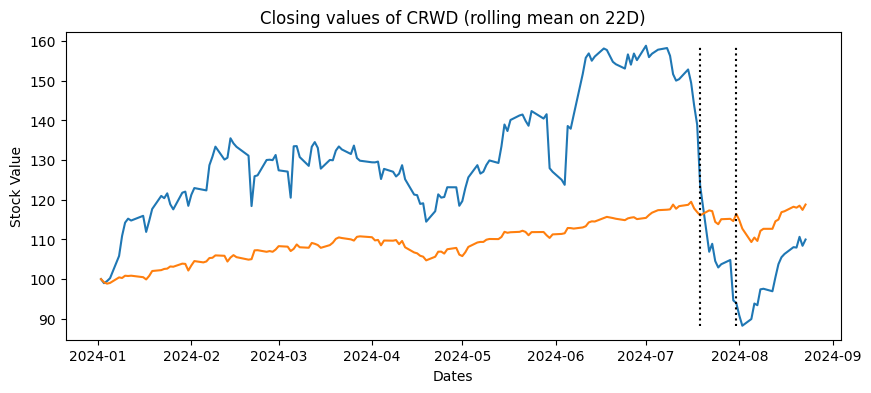

In [183]:
fig = plt.figure(figsize=(10, 4))
plt.plot(normalized_closing['CRWD Close'])
plt.plot(normalized_closing['SP Close'])
plt.title(f'Closing values of {stock} (rolling mean on {period})')
plt.xlabel(f'Dates')
plt.ylabel(f'Stock Value')

# Defining the major events
e1 = datetime.strptime("2024-07-19", "%Y-%m-%d")
e2 = datetime.strptime("2024-07-31", "%Y-%m-%d")

# Adding as vertical lines
plt.vlines(x=e1, ymin=min(normalized_closing['CRWD Close'].min(), normalized_closing['SP Close'].min()), ymax=max(normalized_closing['CRWD Close'].max(), normalized_closing['SP Close'].max()), linestyles='dotted', colors='black')
plt.vlines(x=e2, ymin=min(normalized_closing['CRWD Close'].min(), normalized_closing['SP Close'].min()), ymax=max(normalized_closing['CRWD Close'].max(), normalized_closing['SP Close'].max()), linestyles='dotted', colors='black')

plt.show()

Notice the very little change in the S&P stock whereas the Crowdstrike stock fluctuates a lot, especially the massive drop on the crash dates.

## Autocorrelation of the Time Series

Autocorrelation is the correlation of a time series with a lagged version of itself. Plotting it can give you an idea of how lagged periods correlate to the present period.

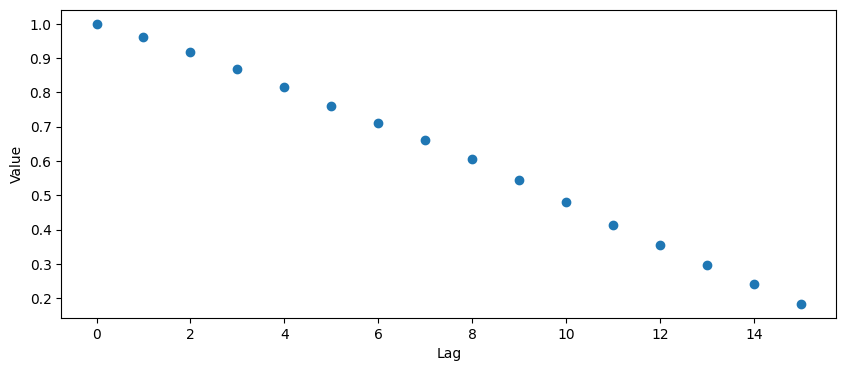

In [184]:
from statsmodels.tsa.stattools import acf

lag = 15

acf_series1 = acf(crwd['CRWD Close'], nlags=lag)

fig = plt.figure(figsize=(10, 4))
plt.scatter(list(range(len(acf_series1))), acf_series1)
plt.xlabel(f'Lag')
plt.ylabel(f'Value')

plt.show()

The high positive correlation at low lag shows that closer values can be used to predict the future since they're positively correlated. 

## Making Simple Forecasts with Autoregression
We are going to fit a model to the CRWD data up until the 10th of August and make a forecast. We are going to use an Autoregression _AR(1)_ model. 

$\large \quad \quad \quad \quad R\\_t \quad \ \ = \quad \mu \quad + \quad \phi \quad R\\_{t-1} \quad  \ + \quad \epsilon\\_t$

An AR(1) model calculates the current value as a mean plus a fraction ( $ \phi $ ) of yesterday's value and some noise. The (1) is because we use only the ${t-1}$ value.
- If $ \phi $ is 0 then the process is just noise.
- If $ \phi $ is 1 then the process is a random walk.

In [191]:
from statsmodels.tsa.arima.model import ARIMA

train_end_date = '2024-08-10'
model = ARIMA(crwd['CRWD Close'][:train_end_date], order=(1, 0, 0))
res = model.fit()

res.summary()

c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             CRWD Close   No. Observations:                  153
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -570.288
Date:                Mon, 26 Aug 2024   AIC                           1146.576
Time:                        23:57:20   BIC                           1155.668
Sample:                             0   HQIC                          1150.269
                                - 153                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        289.4161     38.452      7.527      0.000     214.051     364.781
ar.L1          0.9787      0.024     41.056      0.000       0.932       1.025
sigma2        99.1056      6.481     15.292      0.000      86.403     111.808
===================================================================================
Ljung-Box (L1) (Q):                   1.89   Jarque-Bera (JB):               147.40
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                            -0.65
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Comparing different orders in AR
We ran the model with one lagged parameter. But how does our model compare to one with a different order? We can use the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) to compare goodness of fit for different orders.

c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A dat

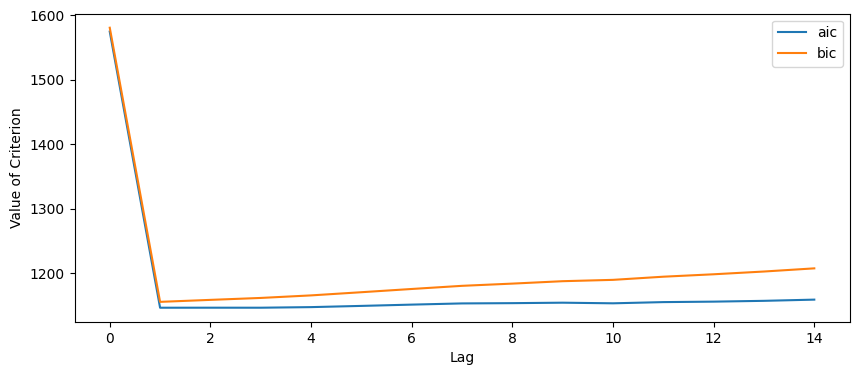

In [297]:
aic, bic = [], []

for i in range(15):
    model = ARIMA(crwd['CRWD Close'][:train_end_date], order=(i, 0, 0))
    res = model.fit()
    aic.append(res.aic)
    bic.append(res.bic)

fig = plt.figure(figsize=(10, 4))
plt.plot(aic, label='aic')
plt.plot(bic, label='bic')
plt.ylabel('Value of Criterion')
plt.xlabel('Lag')
plt.legend()
plt.show()

It looks like both AIC and BIC are lowest at lag 1. We can now use the forecast to make estimates out of sample.

In [298]:
model = ARIMA(crwd['CRWD Close'][:train_end_date], order=(1, 0, 0))
res = model.fit()

c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [299]:
predict = res.get_forecast(steps=10).summary_frame()

predict.head()

c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


CRWD Close,mean,mean_se,mean_ci_lower,mean_ci_upper
153,241.934545,9.955181,222.422748,261.446341
154,242.947035,13.929454,215.645806,270.248263
155,243.937934,16.880421,210.852917,277.022952
156,244.907704,19.288116,207.103692,282.711716
157,245.856795,21.341038,204.029129,287.684461


In [300]:
predict = predict.reset_index(drop=True)
predict = predict.set_index(crwd.index[crwd.index > train_end_date])

predict.head()

CRWD Close,mean,mean_se,mean_ci_lower,mean_ci_upper
Date,,,,
2024-08-12,241.934545,9.955181,222.422748,261.446341
2024-08-13,242.947035,13.929454,215.645806,270.248263
2024-08-14,243.937934,16.880421,210.852917,277.022952
2024-08-15,244.907704,19.288116,207.103692,282.711716
2024-08-16,245.856795,21.341038,204.029129,287.684461


## Plotting the forecast with CIs

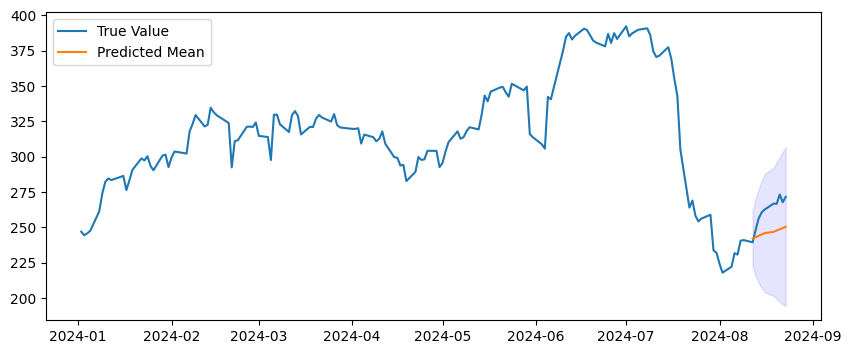

In [301]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(crwd['CRWD Close'], label='True Value')
ax.plot(predict['mean'], label='Predicted Mean')
ax.fill_between(predict.index, (predict['mean_ci_lower']), (predict['mean_ci_upper']), color='b', alpha=.1)
ax.legend()

plt.show()

The first predicted value almost coincides with the true value but the predictions get off over days. However, the true values are contained within the confidence envelop of the predictions.

In [302]:
from sklearn.metrics import mean_squared_error

mse_ar1 = np.sqrt(mean_squared_error(predict['mean'], crwd['CRWD Close'][train_end_date:]))
mse_ar1

16.875620456749115

## Making forecasts with other models

### Naive Persistence

Naive forecast is a baseline model which assumes that $\hat{y}_{n+1} = y_{n}$.

In [280]:
naive_forecast = crwd['CRWD Close'][train_end_date:].shift(1)
naive_forecast.iloc[0] = crwd['CRWD Close'][:train_end_date].iloc[-1]  # First forecast value should be the last value of the training set

# Compare forecast with the actual test data
results = pd.DataFrame({
    'Actual': crwd['CRWD Close'][train_end_date:],
    'Naive Forecast': naive_forecast
})

mse_naive = np.sqrt(mean_squared_error(naive_forecast, crwd['CRWD Close'][train_end_date:]))
mse_naive

5.25786051381526

Normally, the mse for naive persistence would be higher than AR(1) but since we're working with a stock where there is a lot of short-term influence and not much of a long-term behaviour, the MSE for even this baseline naive forecasting is lower than AR(1).

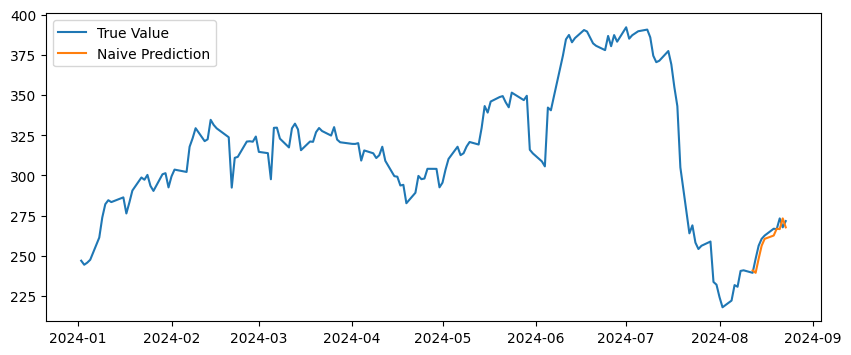

In [281]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(crwd['CRWD Close'], label='True Value')
ax.plot(naive_forecast, label='Naive Prediction')
ax.legend()

plt.show()

### Moving Average (MA)

Moving average takes into account not only the previous values but also the residuals between the past predictions and actual values. 

- Build a forecast model with AR or naive persistence.
- Compute the residuals.
- Build a forecast model on the residuals.
- Use the forecasted residuals to update the original forecasts.

AR combined with MA is called ARMA.

c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A dat

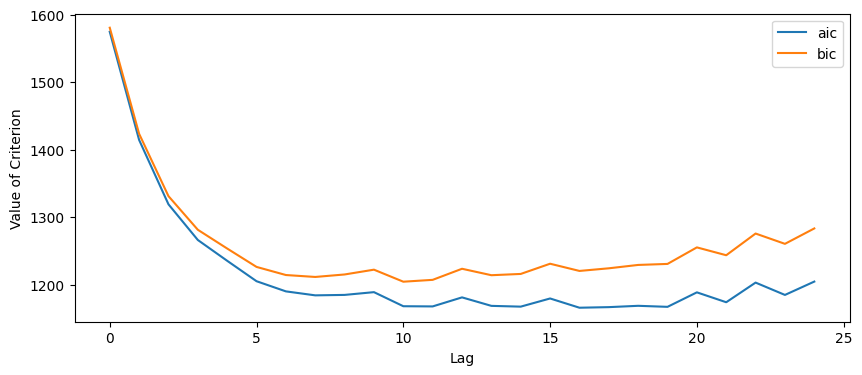

In [293]:
aic, bic = [], []

for i in range(25):
    MA_model = ARIMA(crwd['CRWD Close'][:train_end_date], order=(0, 0, i))
    MA_model = MA_model.fit()
    aic.append(MA_model.aic)
    bic.append(MA_model.bic)

fig = plt.figure(figsize=(10, 4))
plt.plot(aic, label='aic')
plt.plot(bic, label='bic')
plt.ylabel('Value of Criterion')
plt.xlabel('Lag')
plt.legend()
plt.show()

Let's go with 10ish for the model.

In [294]:
MA_model = ARIMA(crwd['CRWD Close'][:train_end_date], order=(0, 0, 10))
MA_model = MA_model.fit()

MA_model = MA_model.get_forecast(steps=10).summary_frame()

MA_model = MA_model.reset_index(drop=True)
MA_model = MA_model.set_index(crwd.index[crwd.index > train_end_date])

MA_model.head()

c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: No

CRWD Close,mean,mean_se,mean_ci_lower,mean_ci_upper
Date,,,,
2024-08-12,249.062738,10.044828,229.375237,268.750239
2024-08-13,262.124352,14.971204,232.781330,291.467373
2024-08-14,277.398155,19.165937,239.833609,314.962702
2024-08-15,286.984565,22.945544,242.012125,331.957005
2024-08-16,297.120985,26.139284,245.888929,348.353041


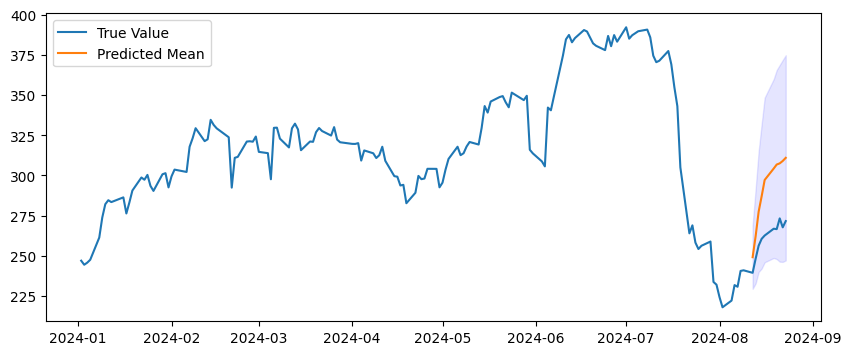

In [295]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(crwd['CRWD Close'], label='True Value')
ax.plot(MA_model['mean'], label='Predicted Mean')
ax.fill_between(MA_model.index, (MA_model['mean_ci_lower']), (MA_model['mean_ci_upper']), color='b', alpha=.1)
ax.legend()

plt.show()

In [296]:
mse_ma = np.sqrt(mean_squared_error(MA_model['mean'], crwd['CRWD Close'][train_end_date:]))
mse_ma

31.757845080315203

### ARIMA

ARIMA is the mix of AR with integrated with MA modelling. ARIMA(p, q, r) refers to the order of all three options respectively.

c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A dat

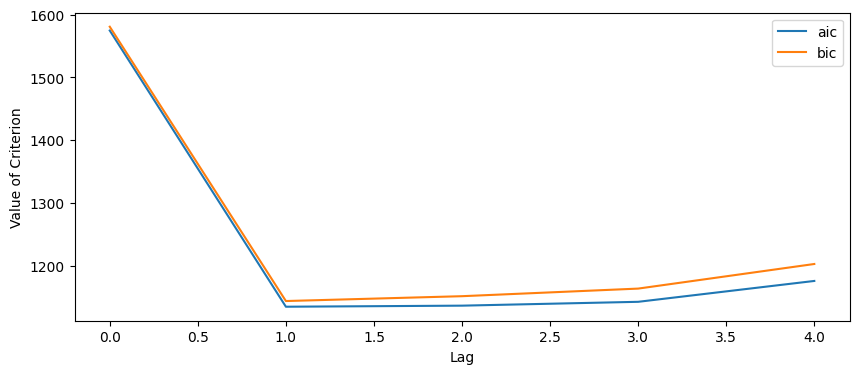

In [305]:
aic, bic = [], []

for i in range(5):
    ARIMA_model = ARIMA(crwd['CRWD Close'][:train_end_date], order=(i, i, i))
    ARIMA_model = ARIMA_model.fit()
    aic.append(ARIMA_model.aic)
    bic.append(ARIMA_model.bic)

fig = plt.figure(figsize=(10, 4))
plt.plot(aic, label='aic')
plt.plot(bic, label='bic')
plt.ylabel('Value of Criterion')
plt.xlabel('Lag')
plt.legend()
plt.show()

In [306]:
ARIMA_model = ARIMA(crwd['CRWD Close'][:train_end_date], order=(1, 1, 1))
ARIMA_model = ARIMA_model.fit()

ARIMA_model = ARIMA_model.get_forecast(steps=10).summary_frame()

ARIMA_model = ARIMA_model.reset_index(drop=True)
ARIMA_model = ARIMA_model.set_index(crwd.index[crwd.index > train_end_date])

ARIMA_model.head()

c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sunia\Downloads\MRC_2024\tda_tutorial\tda_tutorial\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No su

CRWD Close,mean,mean_se,mean_ci_lower,mean_ci_upper
Date,,,,
2024-08-12,241.564729,9.898547,222.163934,260.965524
2024-08-13,242.083515,14.664776,213.341083,270.825947
2024-08-14,242.488398,18.660419,205.914649,279.062147
2024-08-15,242.804385,22.240414,199.213976,286.394795
2024-08-16,243.050995,25.531439,193.010294,293.091695


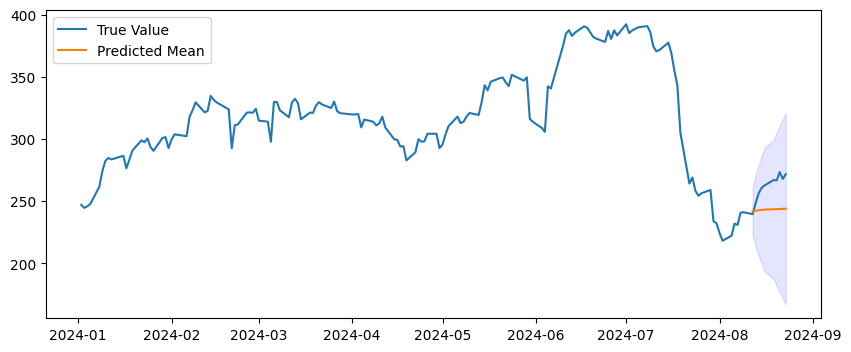

In [307]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(crwd['CRWD Close'], label='True Value')
ax.plot(ARIMA_model['mean'], label='Predicted Mean')
ax.fill_between(ARIMA_model.index, (ARIMA_model['mean_ci_lower']), (ARIMA_model['mean_ci_upper']), color='b', alpha=.1)
ax.legend()

plt.show()

In [308]:
mse_arima = np.sqrt(mean_squared_error(ARIMA_model['mean'], crwd['CRWD Close'][train_end_date:]))
mse_arima

20.61081312484241

## Stochastic Modelling as Ornstein-Uhlenbeck Process

In [309]:
from scipy.optimize import minimize
from scipy.stats import norm

# Define the likelihood function for the OU process
def ou_likelihood(params, data):
    theta, mu, sigma = params
    n = len(data)
    dt = 1
    likelihood = 0
    
    for i in range(1, n):
        x_t = data[i-1]
        x_tp1 = data[i]
        mean = x_t + theta * (mu - x_t) * dt
        variance = sigma**2 * dt
        likelihood += -np.log(norm.pdf(x_tp1, mean, np.sqrt(variance)))
    
    return likelihood

# Initial guess for the parameters
initial_params = [0.1, np.mean(crwd['CRWD Close'][:train_end_date]), np.std(crwd['CRWD Close'][:train_end_date])]
result = minimize(ou_likelihood, initial_params, args=(crwd['CRWD Close'][:train_end_date],), method='L-BFGS-B')

theta, mu, sigma = result.x
print(f"Estimated parameters: theta={theta}, mu={mu}, sigma={sigma}")

C:\Users\sunia\AppData\Local\Temp\ipykernel_1780\1674322260.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_t = data[i-1]
C:\Users\sunia\AppData\Local\Temp\ipykernel_1780\1674322260.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_tp1 = data[i]


Estimated parameters: theta=0.028532671572256384, mu=316.731101495503, sigma=-9.942924721098438


In [310]:
def simulate_ou_process(theta, mu, sigma, x0, n_steps, dt=1):
    """Simulate paths of an Ornstein-Uhlenbeck process."""
    path = np.zeros(n_steps)
    path[0] = x0
    
    for t in range(1, n_steps):
        x_t = path[t-1]
        dX = theta * (mu - x_t) * dt + sigma * np.sqrt(dt) * np.random.normal()
        path[t] = x_t + dX
    
    return path

# Number of steps to simulate
n_steps = len(crwd['CRWD Close'][train_end_date:])

# Start simulation from the last value of the training data
x0 = crwd['CRWD Close'][:train_end_date][-1]

# Simulate one path
simulated_path = simulate_ou_process(theta, mu, sigma, x0, n_steps)

# Convert to DataFrame for comparison
results = pd.DataFrame({
    'Actual': crwd['CRWD Close'][train_end_date:],
    'OU Simulation': simulated_path
})

print(results)


                Actual  OU Simulation
Date                                 
2024-08-12  239.339996     240.899994
2024-08-13  248.110001     223.947810
2024-08-14  256.220001     223.764726
2024-08-15  260.489990     226.046246
2024-08-16  262.540009     238.921218
2024-08-19  266.779999     231.852001
2024-08-20  266.529999     219.078036
2024-08-21  273.209991     240.293989
2024-08-22  267.640015     222.897301
2024-08-23  271.540009     241.203298


C:\Users\sunia\AppData\Local\Temp\ipykernel_1780\775738768.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x0 = crwd['CRWD Close'][:train_end_date][-1]


In [311]:
n_simulations = 1000
all_simulations = np.zeros((n_simulations, n_steps))

for i in range(n_simulations):
    all_simulations[i, :] = simulate_ou_process(theta, mu, sigma, x0, n_steps)

# Calculate mean and prediction intervals
mean_forecast = np.mean(all_simulations, axis=0)
lower_bound = np.percentile(all_simulations, 2.5, axis=0)
upper_bound = np.percentile(all_simulations, 97.5, axis=0)

# Convert to DataFrame for visualization
forecast_results = pd.DataFrame({
    'Actual': crwd['CRWD Close'][train_end_date:],
    'Mean Forecast': mean_forecast,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound
})

print(forecast_results)


                Actual  Mean Forecast  Lower Bound  Upper Bound
Date                                                           
2024-08-12  239.339996     240.899994   240.899994   240.899994
2024-08-13  248.110001     243.180710   222.685930   262.526620
2024-08-14  256.220001     244.930368   218.257971   271.307438
2024-08-15  260.489990     247.197998   214.051145   278.839685
2024-08-16  262.540009     249.106513   212.106885   284.388450
2024-08-19  266.779999     251.068570   208.301745   291.068180
2024-08-20  266.529999     252.716214   208.380764   291.701827
2024-08-21  273.209991     254.388597   208.088354   299.877729
2024-08-22  267.640015     255.795366   207.706654   302.502763
2024-08-23  271.540009     257.672061   206.978653   308.176826


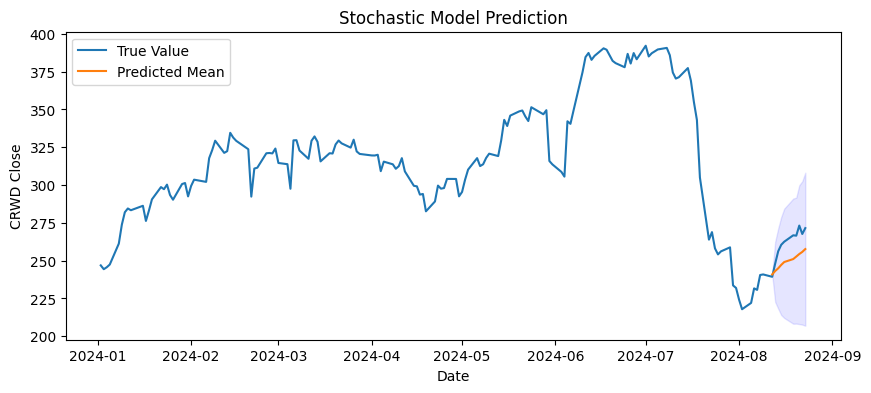

In [314]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(crwd['CRWD Close'], label='True Value')
ax.plot(forecast_results.index, forecast_results['Mean Forecast'], label='Predicted Mean')
ax.fill_between(forecast_results.index, 
                forecast_results['Lower Bound'], 
                forecast_results['Upper Bound'], 
                color='b', alpha=0.1)
ax.set_title('Stochastic Model Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('CRWD Close')
ax.legend()

plt.show()


In [315]:
mse_stoch = np.sqrt(mean_squared_error(crwd['CRWD Close'][train_end_date:], forecast_results['Mean Forecast']))
mse_stoch

12.790048405224448